# Comparing Impacts of Missing Data on Uniform and Lognormal Regressors

In [5]:
from generator import *
from shredder import *
from fitter import *
from fixer import *
from exec_tools import run
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from joblib import Parallel, delayed
from math import sqrt
import time
import itertools
#np.random.seed(10)



In [6]:
data_gen = [x_def_helper('uniform', coeff=10, low=0, high=1)]

# start = time.time()
# results = Parallel(n_jobs=2)(delayed(run_new)() for i in range(100))

levels = [
    (data_gen,),
    ("mean", "invert", "drop"), # Imputation types
    (.01, .1, .2), # sigma_beta ratios
    (20, 50, 100), # Sample size levels
    (.05,), # % missing data increments -- Only ever one value
    (0,), # Min % missing data -- Only ever one value
    (.8,), # Max % missing data -- Only ever one value
    range(10) # Number of replications
]

print(len(list(itertools.product(*levels))))


270


In [3]:
start = time.time()
results = Parallel(n_jobs=-1, verbose=1)(delayed(run)(*args) for args in itertools.product(*levels))

results = pd.concat(results)

print(results.shape)

print(time.time() - start)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   21.7s finished


(4320, 13)
21.972431182861328


In [4]:
results.groupby(["action_type", "pct_missing", "sample_size", "beta_sigma"]).mean().reset_index()

,action_type,pct_missing,sample_size,beta_sigma,nobs,r2,r2_adj,bic,beta_x1_rng,beta_x1_target,beta_x1,r2_pred,mse
0,drop,0.00,20,0.01,20.0,0.998715,0.998644,-31.906603,0.344544,0.9,9.952552,0.998403,0.011098
1,drop,0.00,20,0.10,20.0,0.895702,0.889907,59.278329,3.378705,1.0,10.132320,0.769850,1.603565
2,drop,0.00,20,0.20,20.0,0.679310,0.661494,83.877805,6.326845,1.0,9.517988,0.407545,4.834659
3,drop,0.00,50,0.01,50.0,0.998786,0.998761,-79.295750,0.200834,1.0,9.996430,0.998736,0.009997
4,drop,0.00,50,0.10,50.0,0.892857,0.890625,145.111275,1.965131,1.0,9.829829,0.897486,0.873736
5,drop,0.00,50,0.20,50.0,0.686909,0.680386,214.781290,3.834696,1.0,9.853859,0.642501,3.677054
6,drop,0.00,100,0.01,100.0,0.998792,0.998780,-171.957257,0.138855,0.9,9.989575,0.998697,0.009726
7,drop,0.00,100,0.10,100.0,0.906892,0.905942,279.383114,1.269128,1.0,9.899296,0.887313,1.014508
8,drop,0.00,100,0.20,100.0,0.668453,0.665070,425.995549,2.800482,0.9,9.948326,0.678588,3.564251
9,drop,0.05,20,0.01,19.0,0.998691,0.998614,-30.149541,0.358507,0.9,9.958868,0.998356,0.011270


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1119b0320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1124379b0>]], dtype=object)

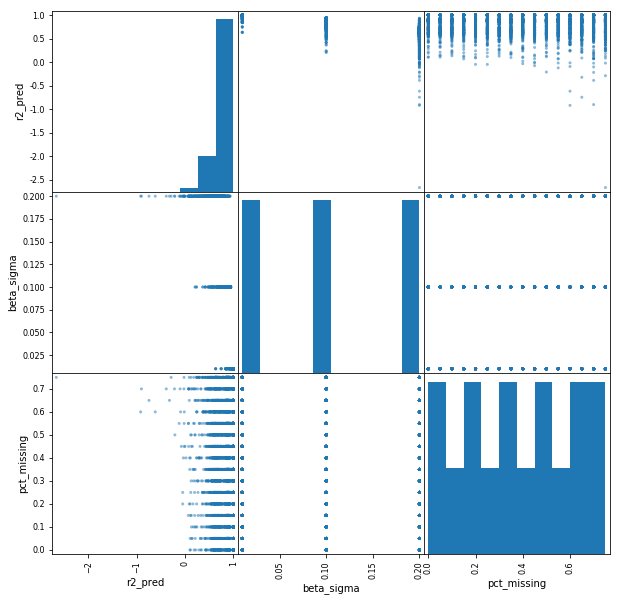

In [15]:
scatter_matrix(results[['r2_pred', 'beta_sigma', 'pct_missing']], figsize=(10,10))